In [34]:
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [35]:
batch_size = 128
nb_classes = 10
nb_epoch = 1

# 输入图像的维度，此处是mnist图像，因此是28*28
img_rows, img_cols = 28, 28
# 卷积层中使用的卷积核的个数
nb_filters = 32
# 池化层操作的范围
pool_size = (2,2)
# 卷积核的大小
kernel_size = (3,3)
# keras中的mnist数据集已经被划分成了60,000个训练集，10,000个测试集的形式，按以下格式调用即可
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 后端使用tensorflow时，即tf模式下，
# 会将100张RGB三通道的16*32彩色图表示为(100,16,32,3)，
# 第一个维度是样本维，表示样本的数目，
# 第二和第三个维度是高和宽，
# 最后一个维度是通道维，表示颜色通道数
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
# 将X_train, X_test的数据格式转为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 归一化
X_train /= 255
X_test /= 255
# 打印出相关信息
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# 将类别向量(从0到nb_classes的整数向量)映射为二值类别矩阵，
# 相当于将向量用one-hot重新编码
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [36]:
# 输入图像的维度，此处是mnist图像，因此是28*28
img_rows, img_cols = 28, 28
# 卷积层中使用的卷积核的个数
nb_filters = 32
# 池化层操作的范围
pool_size = (2,2)
# 卷积核的大小
kernel_size = (3,3)

input_shape = (img_rows, img_cols,1)

In [51]:
# 建立序贯模型
model = Sequential()

# 卷积层，对二维输入进行滑动窗卷积
# 当使用该层为第一层时，应提供input_shape参数，在tf模式中，通道维位于第三个位置
# border_mode：边界模式，为"valid","same"或"full"，即图像外的边缘点是补0
# 还是补成相同像素，或者是补1
cnn2d = Convolution2D(nb_filters, (kernel_size[0] ,kernel_size[1]),
                        padding='valid',
                        input_shape=input_shape)

model.add(cnn2d)
model.add(Activation('relu'))

# 卷积层，激活函数是ReLu
model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1])))
model.add(Activation('relu'))

# 池化层，选用Maxpooling，给定pool_size，dropout比例为0.25
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# Flatten层，把多维输入进行一维化，常用在卷积层到全连接层的过渡
model.add(Flatten())

# 包含128个神经元的全连接层，激活函数为ReLu，dropout比例为0.5
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 包含10个神经元的输出层，激活函数为Softmax
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# 输出模型的参数信息
model.summary()
# 配置模型的学习过程
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
__________

In [62]:
# 训练模型
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

# 按batch计算在某些输入数据上模型的误差
score = model.evaluate(X_test, Y_test, verbose=0)

# 输出训练好的模型在测试集上的表现
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 54s 905us/step - loss: 0.1015 - acc: 0.9704 - val_loss: 0.0417 - val_acc: 0.9870
Test score: 0.04174270230541006
Test accuracy: 0.987


In [42]:
score = model.evaluate(X_train, Y_train, verbose=0)

# 输出训练好的模型在测试集上的表现
print('X_train score:', score[0])
print('Test accuracy:', score[1])

X_train score: 0.06428892826000228
Test accuracy: 0.9807666666666667


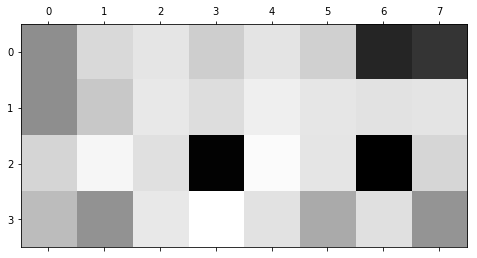

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
# for i in range(10):
plt.matshow(model.get_layer(index=0).get_weights()[1].reshape(4,8),cmap='Greys')

In [59]:
print(cnn2d.get_weights()[0].shape)

(3, 3, 1, 32)


In [74]:
from keras import models
import imageio
from keras.preprocessing import image
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

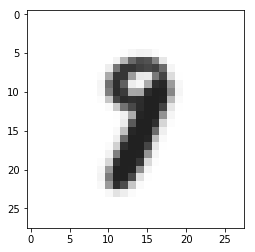

(1, 28, 28, 3)


In [101]:
img_path = '../2019-02-21/my_own_images/9.png'
img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

c = img_tensor.copy()
c.resize((1,28,28,1))
activations = activation_model.predict(c) # Returns a list of five Numpy arrays: one array per layer activation

(1, 26, 26, 32)


/Users/bigface/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


IndexError: too many indices for array

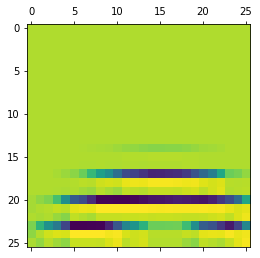

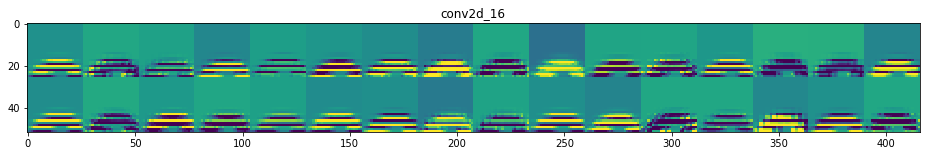

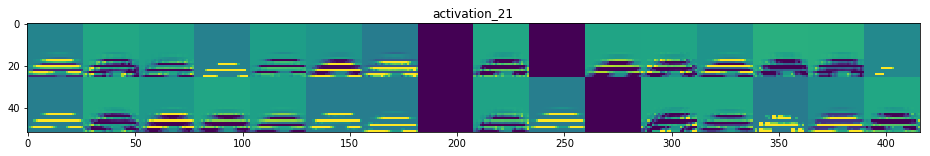

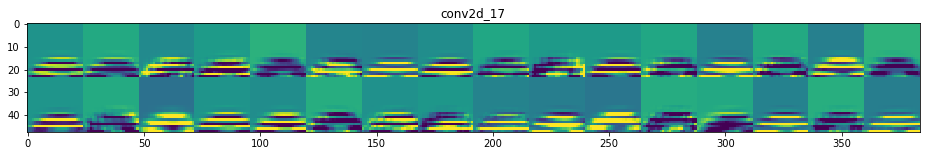

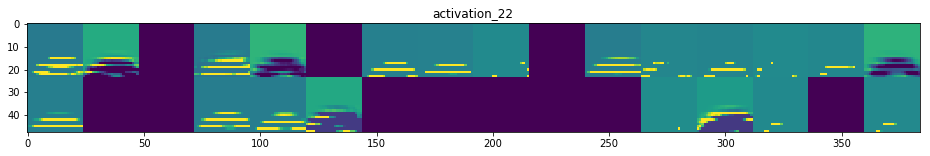

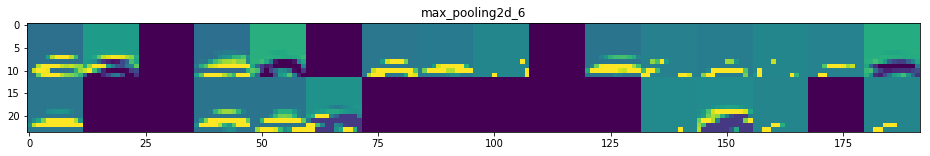

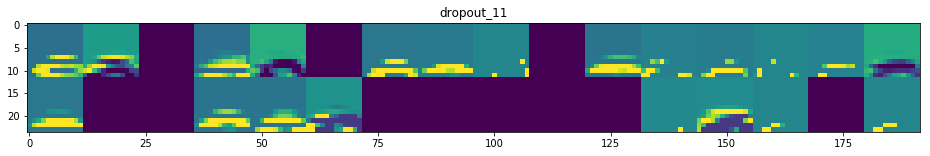

In [102]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')